In [0]:
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
#from sklearn.utils.validation import train_test_split
import cv2
import numpy as np
from matplotlib.pyplot import imshow 

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


from keras.models import Sequential, Model
from keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adadelta
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model

# dataset mounting from google drive

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Each class is assigned to a specific number

In [0]:
classes = {'binocular' : 0, 'camera' : 1, 'ceiling_fan' : 2, 'chair' : 3, 'cup' : 4, 'headphone' : 5, 'lamp' : 6, 'scissors' : 7 , 'umbrella' : 8 , 'wrench' : 9}


#Exploring data and resizing every image 

In [87]:
path = '/content/drive/My Drive/'
dataset_path = '/content/drive/My Drive/dataset'

class_labels = []
 
# features = []
# labels = []
count_of_images = []

X = np.ndarray((505, 300, 300, 3), dtype=np.uint8)
Y = []
c = 0
for i in os.listdir(dataset_path):
    a = dataset_path + "/" + i
    if not a.endswith(".ipynb_checkpoints"):
      for k in os.listdir(a):
          l = a + "/" + k
          img = cv2.imread(l)
          img1 = cv2.resize(img,(300,300))
          # features.append(img1)
          # labels.append(classes[i])
          X[c] = img1
          Y.insert(c, i)
          c += 1
      count_of_images.append(len(os.listdir(a)))                 
#print(count_of_images)
# print(features)
print(len(X))




505


# plotting graph (number of images for each class)

<BarContainer object of 10 artists>

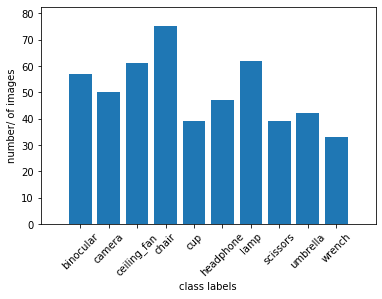

In [88]:
class_labels = list(classes.keys())
# features1 = np.stack(features,axis = 0).reshape(505,300*300*3)
#print(sum(count_of_images))
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.xlabel('class labels')
plt.ylabel('number/ of images')

plt.margins(0.1)
plt.xticks(x, class_labels, rotation = 45)
plt.bar(class_labels, count_of_images)

cup


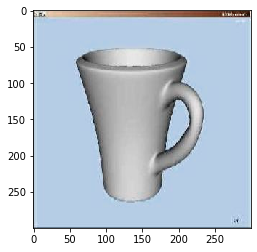

In [89]:
imshow(X[0])
print(Y[0])



In [90]:
label_encoder = LabelEncoder()
Y_integer_encoded = label_encoder.fit_transform(Y)
Y_integer_encoded

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [91]:
len(Y_integer_encoded)

505

In [92]:
Y_one_hot = to_categorical(Y_integer_encoded)
Y_one_hot


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [93]:
Y_one_hot[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [94]:
len(Y_one_hot)

505

In [95]:
X_normalized = X.astype(np.float64) / 255
X_normalized[0]

array([[[0.63921569, 0.61568627, 0.59607843],
        [0.98039216, 0.95686275, 0.9372549 ],
        [0.90196078, 0.88627451, 0.86666667],
        ...,
        [1.        , 0.99215686, 0.95686275],
        [0.82745098, 0.77254902, 0.74901961],
        [0.90588235, 0.85882353, 0.83529412]],

       [[0.59215686, 0.56078431, 0.5372549 ],
        [0.83137255, 0.80784314, 0.78431373],
        [0.88235294, 0.8627451 , 0.83921569],
        ...,
        [0.54509804, 0.48627451, 0.45490196],
        [0.49411765, 0.43137255, 0.40392157],
        [0.83921569, 0.78039216, 0.75686275]],

       [[0.61176471, 0.57647059, 0.54509804],
        [0.67058824, 0.63921569, 0.60784314],
        [0.79215686, 0.76470588, 0.73333333],
        ...,
        [0.2745098 , 0.18039216, 0.14509804],
        [0.3254902 , 0.24313725, 0.21568627],
        [0.88627451, 0.82745098, 0.8       ]],

       ...,

       [[0.47843137, 0.5254902 , 0.57254902],
        [0.72156863, 0.77647059, 0.82352941],
        [0.7372549 , 0

# Splitting data

In [0]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_normalized, Y_one_hot, test_size = 0.25, random_state = 42)


In [97]:
X_train.shape

(378, 300, 300, 3)

# checking whether the image and class name matched or not

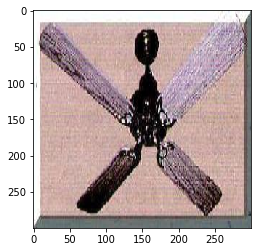

In [98]:
imshow(X_train[89])

In [0]:
def classLabel(val):
  for key, value in classes.items():
    if(value == val):
      return key

In [100]:
classLabel(np.argmax(Y_train[89]))

'ceiling_fan'

In [101]:
Y_train.shape

(378, 10)

In [102]:
model_cnn = Sequential()
model_cnn.add(Conv2D(8, (3,3), activation='relu', input_shape=(300,300,3)))
model_cnn.add(Conv2D(16, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn.add(Conv2D(32, (3,3), activation='relu'))

model_cnn.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 298, 298, 8)       224       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 296, 296, 16)      1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 170528)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
model_cnn.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [104]:
model_cnn.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_validation,Y_validation))

Train on 378 samples, validate on 127 samples
Epoch 1/10
378/378 [==============================] - 45s 120ms/step - loss: 7.5752 - acc: 0.1243 - val_loss: 5.3499 - val_acc: 0.1969
Epoch 2/10
378/378 [==============================] - 44s 117ms/step - loss: 3.2387 - acc: 0.1931 - val_loss: 2.2589 - val_acc: 0.1496
Epoch 3/10
378/378 [==============================] - 44s 117ms/step - loss: 1.7842 - acc: 0.4577 - val_loss: 2.0242 - val_acc: 0.3228
Epoch 4/10
378/378 [==============================] - 44s 117ms/step - loss: 1.2724 - acc: 0.6958 - val_loss: 1.8448 - val_acc: 0.4488
Epoch 5/10
378/378 [==============================] - 45s 118ms/step - loss: 0.8442 - acc: 0.7619 - val_loss: 1.9388 - val_acc: 0.4646
Epoch 6/10
378/378 [==============================] - 44s 117ms/step - loss: 0.5944 - acc: 0.8466 - val_loss: 2.0258 - val_acc: 0.4252
Epoch 7/10
378/378 [==============================] - 44s 117ms/step - loss: 0.3971 - acc: 0.9101 - val_loss: 1.9649 - val_acc: 0.4882
Epoch 8/1

In [0]:
l = "/content/image_0001.jpg"
image = cv2.imread(l)
resized_image = cv2.resize(image,(300,300))
reshape_image = resized_image.reshape(1,300, 300, 3)
prediction = model_cnn.predict(reshape_image)

In [106]:
print(classLabel(np.argmax(prediction)))

camera
